In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import joblib

In [7]:
df=pd.read_csv("diabetes.csv")
df.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X=df.iloc[:,0:7]
Y=df["class"]


In [16]:
# Further splitting of data into training and testing data sets
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state = 1)
x_train

,preg,plas,pres,skin,test,mass,pedi
88,15,136,70,32,110,37.1,0.153
467,0,97,64,36,100,36.8,0.600
550,1,116,70,28,0,27.4,0.204
147,2,106,64,35,119,30.5,1.400
481,0,123,88,37,0,35.2,0.197
...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134
715,7,187,50,33,392,33.9,0.826
72,13,126,90,0,0,43.4,0.583
235,4,171,72,0,0,43.6,0.479


In [17]:
model = DecisionTreeClassifier(criterion = 'entropy' ,max_depth =None)
model. fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

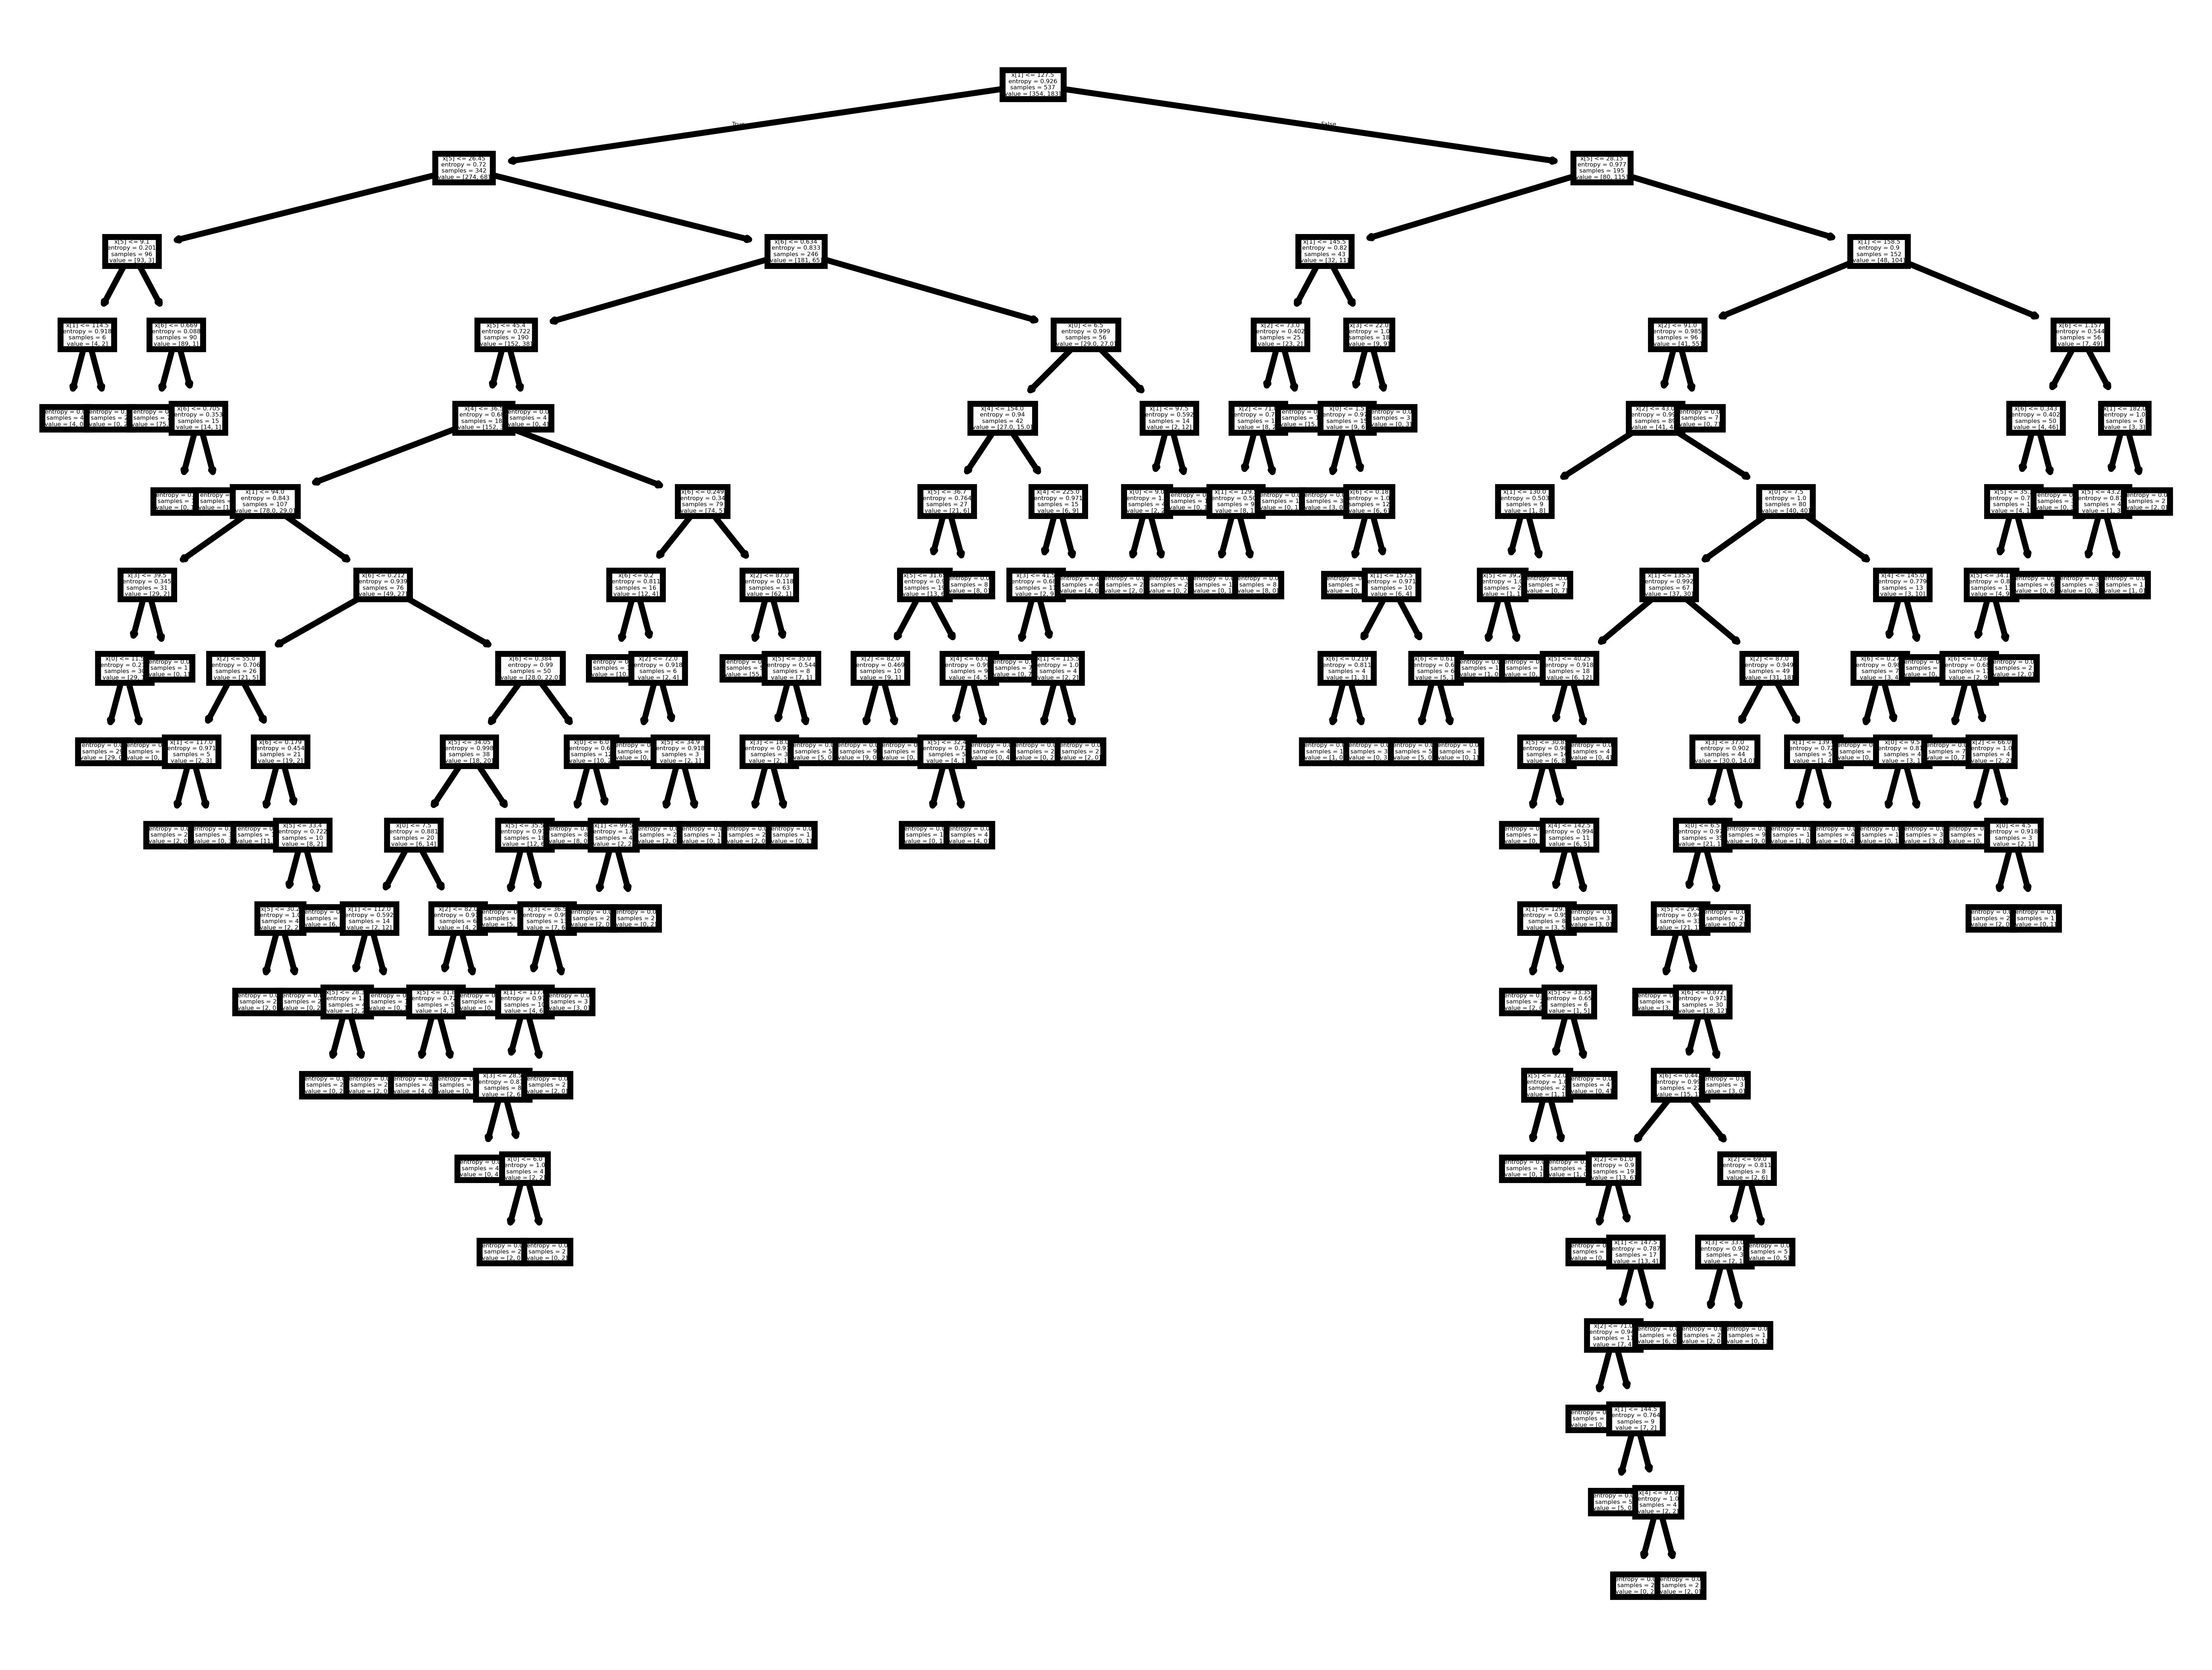

In [18]:
#PLot the decision tree
plt.figure (dpi=1200)
tree. plot_tree(model);

In [20]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [21]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       146
           1       0.56      0.52      0.54        85

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231



In [23]:
# Use Grid search CV to find best parameters (Hyper parameter tuning)
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,None],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,100,200,500],
    'max_features':["sqrt","log2",None],
    'criterion':["gini","entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=10, scoring="accuracy")
grid_search.fit(X, Y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\aly19\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=10)

In [24]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 50}
0.7670401493930906


In [25]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [32]:
X=df.drop(columns=["class"])

In [33]:
scaler = StandardScaler ()
X_scaled = scaler. fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [36]:
# K-Fold Cross-Validation
model = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score (model, X_scaled, Y, cv=kf)

print("Cross-validation scores:", scores)
print ("Mean accuracy:", scores.mean())

Cross-validation scores: [0.74675325 0.72077922 0.71428571 0.7254902  0.7254902 ]
Mean accuracy: 0.7265597147950089


In [38]:
# Train final model
model. fit(X_scaled, Y)
# Save model and, scaler
joblib.dump (model, 'model.pkl')
joblib. dump (scaler, 'scaler.pk1')

['scaler.pk1']